# Assignment 7

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?
#### w为权重，x为输入，经过神经元进行矩阵相乘得到计算结果z，该结果通过激活函数得到神经元的输出。

####  2. Why we use non-linear activation funcitons in neural networks?
####  使用非线性激活函数可以给神经元引入了非线性因素，使得神经网络可以任意逼近任何非线性函数，这样神经网络就可以应用到众多的非线性模型。
####  3. What is the 'Logistic Loss' ?
####  L(y,y_hat) = -1/m *Σ (y*log(y_hat)+(1-y)*log(1-y_hat))

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?
#### C

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

#### 5. Why we don't use zero initialization for all parameters ?
#### 初始化为0会导致梯度更新时参数相同以及输出值都一样，不同的结点无法学到不同的特征

#### 6. Can you implement the softmax function using python ? 

In [12]:
import numpy as np
x = [1,2, 3, 4]
print(x)
def softmax(x):
    x_exp = np.exp(x)
    #如果是列向量，则axis=0
    x_sum = np.sum(x_exp, axis = 0, keepdims = True)
    res = x_exp / x_sum    
    return res
softmax_res=softmax(x)
print('最大值与最小值比例：{}'.format(x[3]/x[0]))
print('最大值与第二大值比例：{}'.format(x[3]/x[2]))
print('最小值与第二小值比例：{}'.format(x[0]/x[1]))
print('softmax最大值与最小值比例：{}'.format(softmax_res[3]/softmax_res[0]))
print('softmax最大值与第二大值比例：{}'.format(softmax_res[3]/softmax_res[2]))
print('softmax最小值与第二小值比例：{}'.format(softmax_res[0]/softmax_res[1]))

[1, 2, 3, 4]
最大值与最小值比例：4.0
最大值与第二大值比例：1.3333333333333333
最小值与第二小值比例：0.5
softmax最大值与最小值比例：20.085536923187664
softmax最大值与第二大值比例：2.718281828459045
softmax最小值与第二小值比例：0.3678794411714423


****
实现一个softmax函数，观察一个向量经过softmax函数之后，最大值于最小值比例的变化，最大值于第二大值比例的变化，最小值于第二小值比例的变化

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [4]:
# Loading the data 
digits = datasets.load_digits()

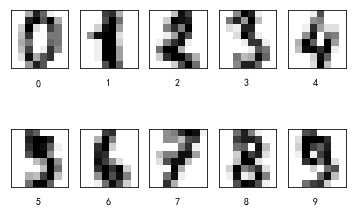

In [5]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [6]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [7]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test)

(1347, 64)
(450, 64)
(1347,)
(450,)
[0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0
 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1
 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1
 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0
 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0
 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 1 0]


#### 3- Architecture of the neural network

![title](./networks.png)

In [4]:
!pwd

/Users/limingxiao/Desktop/NLP_Lectures/jupyters_and_slides/2019-spring


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [1]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1.0/(1+np.exp(-z))
    
    return s

In [2]:
import numpy as np
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [69]:
# Random innitialize the parameters
def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim,1)
    b = int(np.zeros(1))
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b
w,b = initialize_parameters(64)
print(b)

0


#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [88]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights,shape = (64,1)
    b - bias,
    X - data,shape = (1347, 64)
    Y - ground truth = (1347,) shape为(3, 1)（表多维数组）与shape为(3, )（表一维数组）
    '''
    m = X.shape[0] # 1347
#     print(m)
    A = sigmoid(np.dot(w.T,X.T)+b)
#     print('A.shape:{}'.format(A.shape)) # (1,1347)
#     print('label.shape:{}'.format(Y.shape))
    cost = (-1.0/m)*np.sum(Y*np.log(A)+(1-Y)*(np.log(1-A)))
#     print('cost.shape:{}'.format(cost.shape))
    print('****',cost)
    
    dw = 1/m*np.dot(X.T,(A-Y).T)
#     print('dw.shape:{}'.format(dw.shape))
    db = 1/m*np.sum(A-Y)
#     print(db.shape)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
#     cost=np.expand_dims(cost,axis = 1)
#     cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost
propagate(w,b,X_train,y_train)


##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [11]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [81]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
#     print('w',w.shape)
#     print('b',b.shape)
#     print('x.shape',X.shape)    
    A = sigmoid(np.dot(w.T,X.T) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [100]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    w_init , b_init = initialize_parameters(X_train.shape[1])
    params, grads, train_costs = optimize(w_init , b_init, X_train, Y_train, num_iterations, learning_rate, print_cost=False)
    w_out = params['w']
    b_out = params['b']
    prediction_train = predict(w_out, b_out, X_train)
    prediction_train_sum = np.sum((np.equal(prediction_train,Y_train)).T)
    training_accuracy = prediction_train_sum/X_train.shape[0]
#     print(training_accuracy)
#     print('#####################')
    prediction_test = predict(w_out, b_out, X_test)
    prediction_test_sum = np.sum((np.equal(prediction_test,Y_test)).T)
    test_accuracy = prediction_test_sum/X_test.shape[0]
#     print(test_accuracy)
#     print('prediction_train',prediction_train.shape)
    return train_costs,training_accuracy,test_accuracy

In [41]:
np.sum([[1,2]])

3

In [99]:
X_train2 = X_train/255.
X_test2 = X_test/255.
num_iterations = 5000
learning_rate = 0.001
print_cost = False
costs,training_accuracy,test_accuracy = model(X_train2, y_train, X_test2, y_test, num_iterations, learning_rate,print_cost)

learning_rates:1,training_accuracy:0.6124721603563474
learning_rates:1,test_accuracy:0.6177777777777778
learning_rates:0.01,training_accuracy:0.4922048997772829
learning_rates:0.01,test_accuracy:0.5133333333333333
learning_rates:0.005,training_accuracy:0.5233853006681515
learning_rates:0.005,test_accuracy:0.5533333333333333
learning_rates:0.0001,training_accuracy:0.495916852264291
learning_rates:0.0001,test_accuracy:0.5
learning_rates:1e-05,training_accuracy:0.4825538233110616
learning_rates:1e-05,test_accuracy:0.49777777777777776


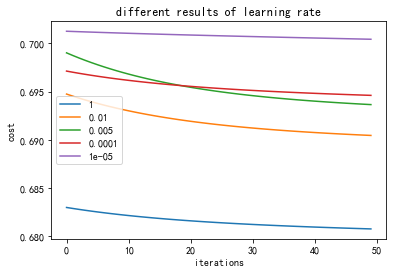

In [108]:
X_train2 = X_train/255.
X_test2 = X_test/255.
learning_rates = [1,0.01,0.005,0.0001,0.00001]

for i in range(len(learning_rates)):
    train_costs,training_accuracy,test_accuracy = model(X_train2, y_train, X_test2, y_test, num_iterations, learning_rate,print_cost)
    costs = np.squeeze(train_costs)
    print('learning_rates:{},training_accuracy:{}'.format(learning_rates[i],training_accuracy))
    print('learning_rates:{},test_accuracy:{}'.format(learning_rates[i],test_accuracy))
    plt.plot(costs, label= str(learning_rates[i]))

plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("different results of learning rate")

legend = plt.legend()
plt.show()


In [110]:
num_iterations = [500,5000,10000]
for i in range(len(num_iterations)):
    train_costs,training_accuracy,test_accuracy = model(X_train2, y_train, X_test2, y_test, num_iterations[i], learning_rate,print_cost)
    costs = np.squeeze(train_costs)
    print('num_iterations:{},training_accuracy:{}'.format(num_iterations[i],training_accuracy))
    print('num_iterations:{},test_accuracy:{}'.format(num_iterations[i],test_accuracy))

num_iterations:500,training_accuracy:0.49368968077208614
num_iterations:500,test_accuracy:0.4688888888888889
num_iterations:5000,training_accuracy:0.47809948032665184
num_iterations:5000,test_accuracy:0.49777777777777776
num_iterations:10000,training_accuracy:0.5315515961395694
num_iterations:10000,test_accuracy:0.5333333333333333


### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

### 关于学习率的设置，好像不是之前说的越小越好，这个案例中反而设置为1的时候效果更好

##### 4.2 Observe the effect of iteration_num on the test accuracy.

### 关于迭代次数，还未遇到过拟合，因此迭代次数越好效果越好。

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

# Congratulations ! You have completed assigment 7. 